# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# TASK #1: PROJECT OVERVIEW 


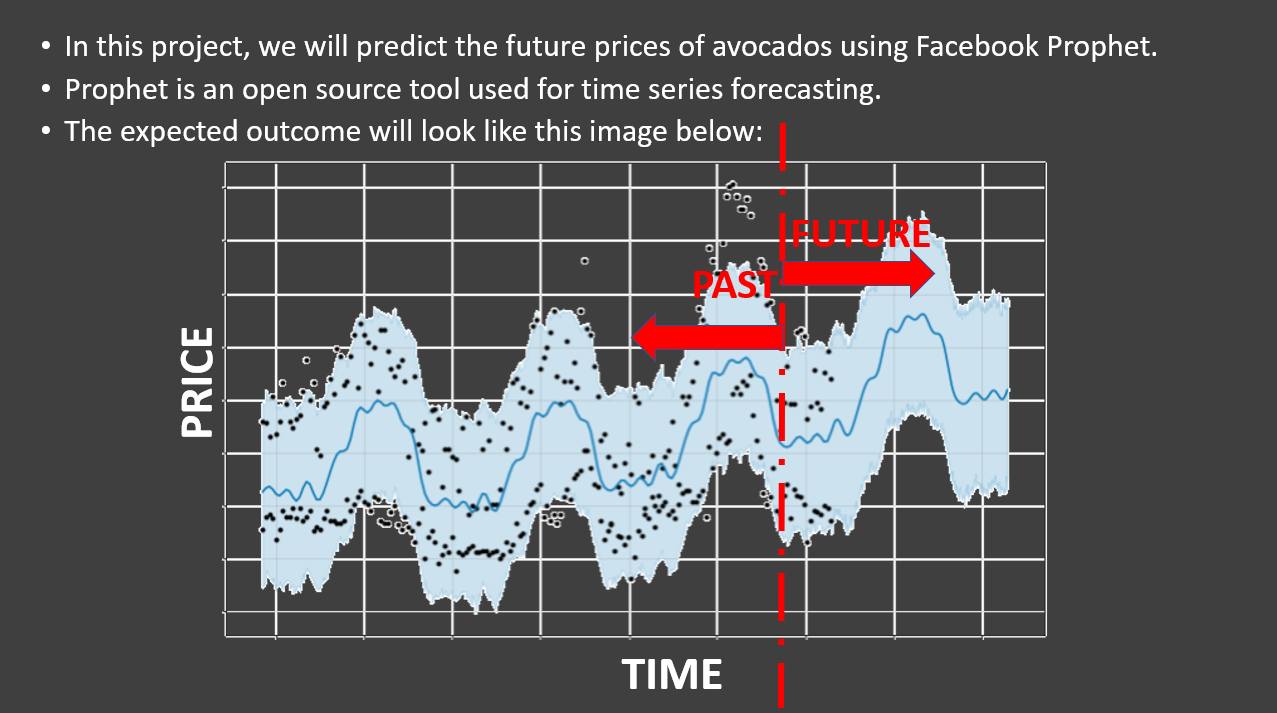


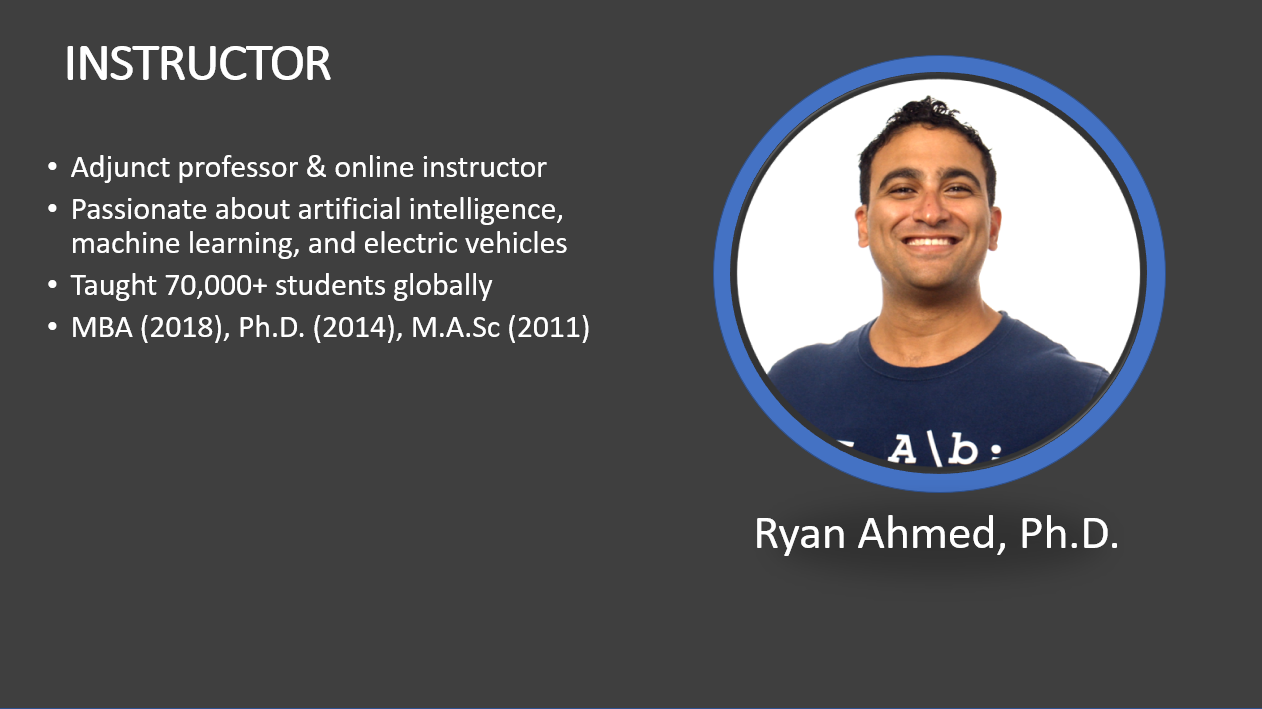

# TASK #2: IMPORT LIBRARIES AND DATASET

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [22]:
# dataframes creation for both training and testing datasets 
avocado_df=pd.read_csv("avocado.csv")
avocado_df.drop(['Unnamed: 0'],axis=1,inplace=True)


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [23]:
# Let's view the head of the training dataset
avocado_df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [24]:
# Let's view the last elements in the training dataset
avocado_df.tail(1)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [25]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [26]:
avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


## To show whether there is a null value or not.

In [29]:
avocado_df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


# TASK #3: EXPLORE DATASET  

In [33]:
avocado_df=avocado_df.sort_values('Date')

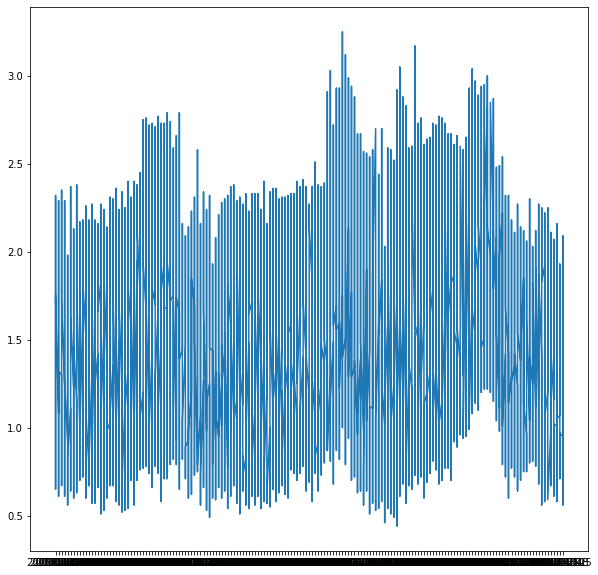

In [35]:
# Plot date and average price
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

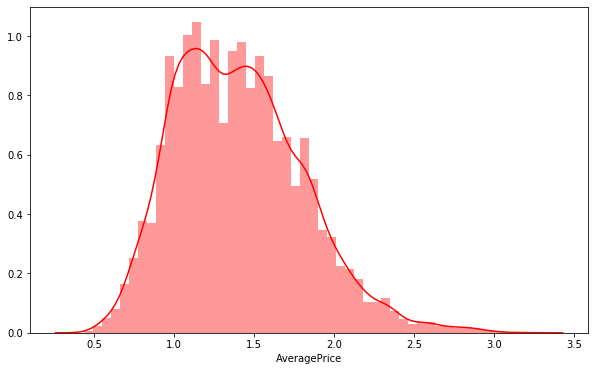

In [44]:
# Plot distribution of the average price
plt.figure(figsize=(10,6))
sns.distplot(avocado_df['AveragePrice'],color='Red')

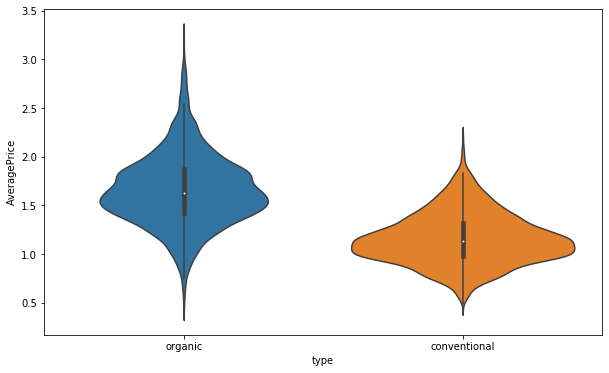

In [47]:
# Plot a violin plot of the average price vs. avocado type
plt.figure(figsize=(10,6))
sns.violinplot(y='AveragePrice',x='type',data=avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

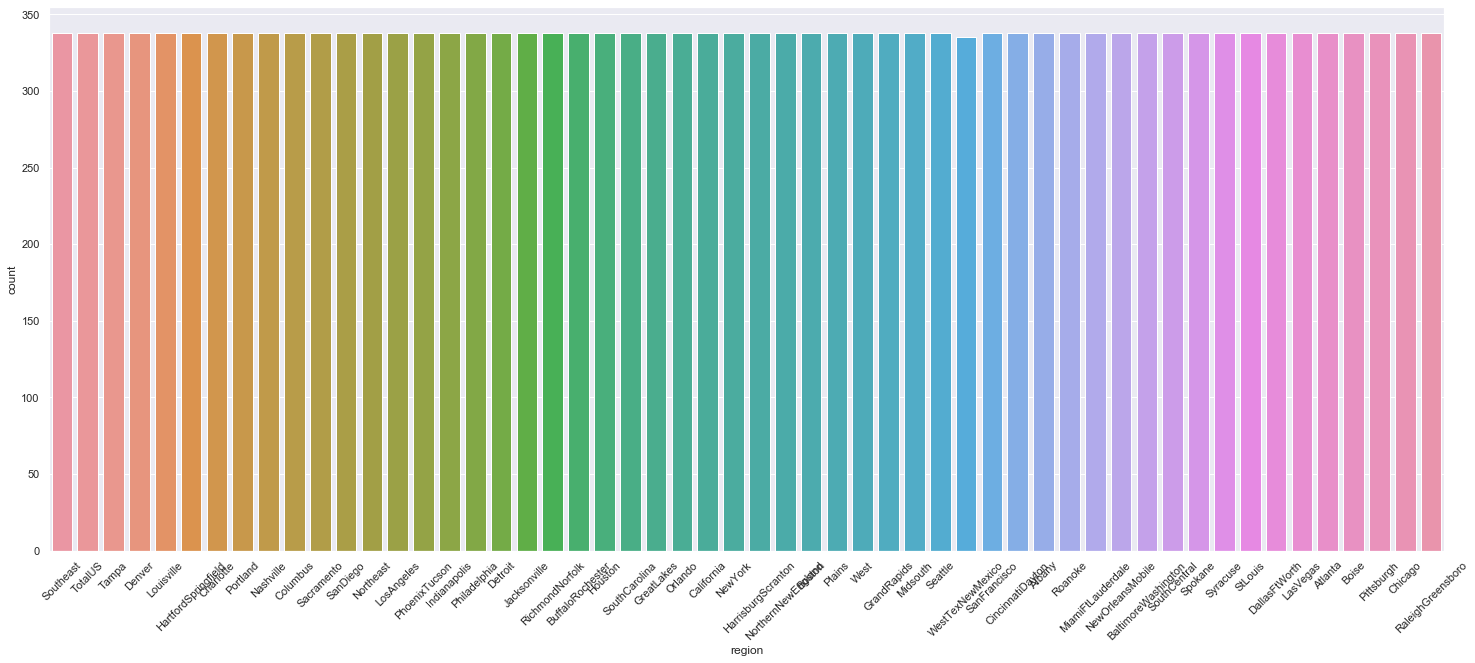

In [55]:
# Bar Chart to indicate the number of regions 
sns.set(font_scale=1.0) 
plt.figure(figsize=[25,10])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text yticklabel objects>)

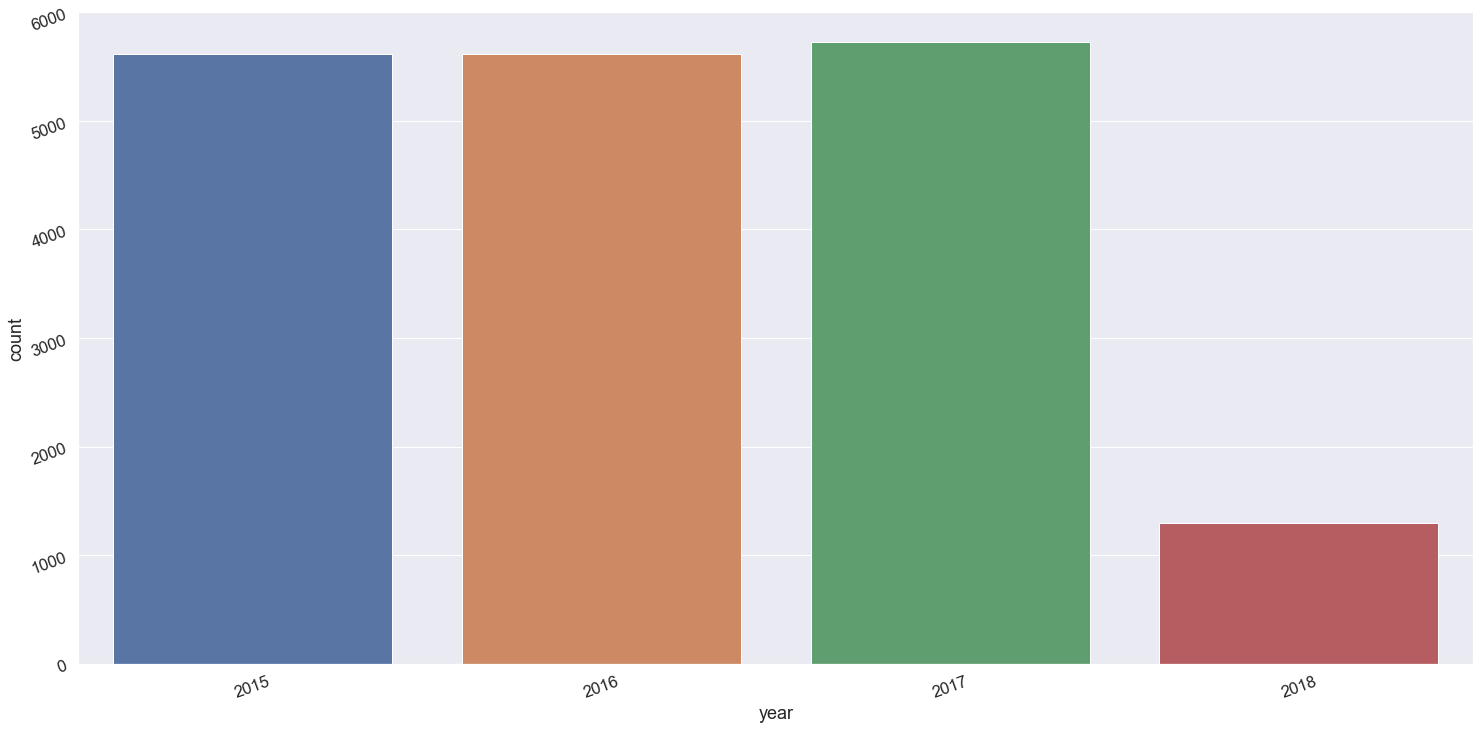

In [62]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 20)
plt.yticks(rotation=20)

<Figure size 720x720 with 0 Axes>

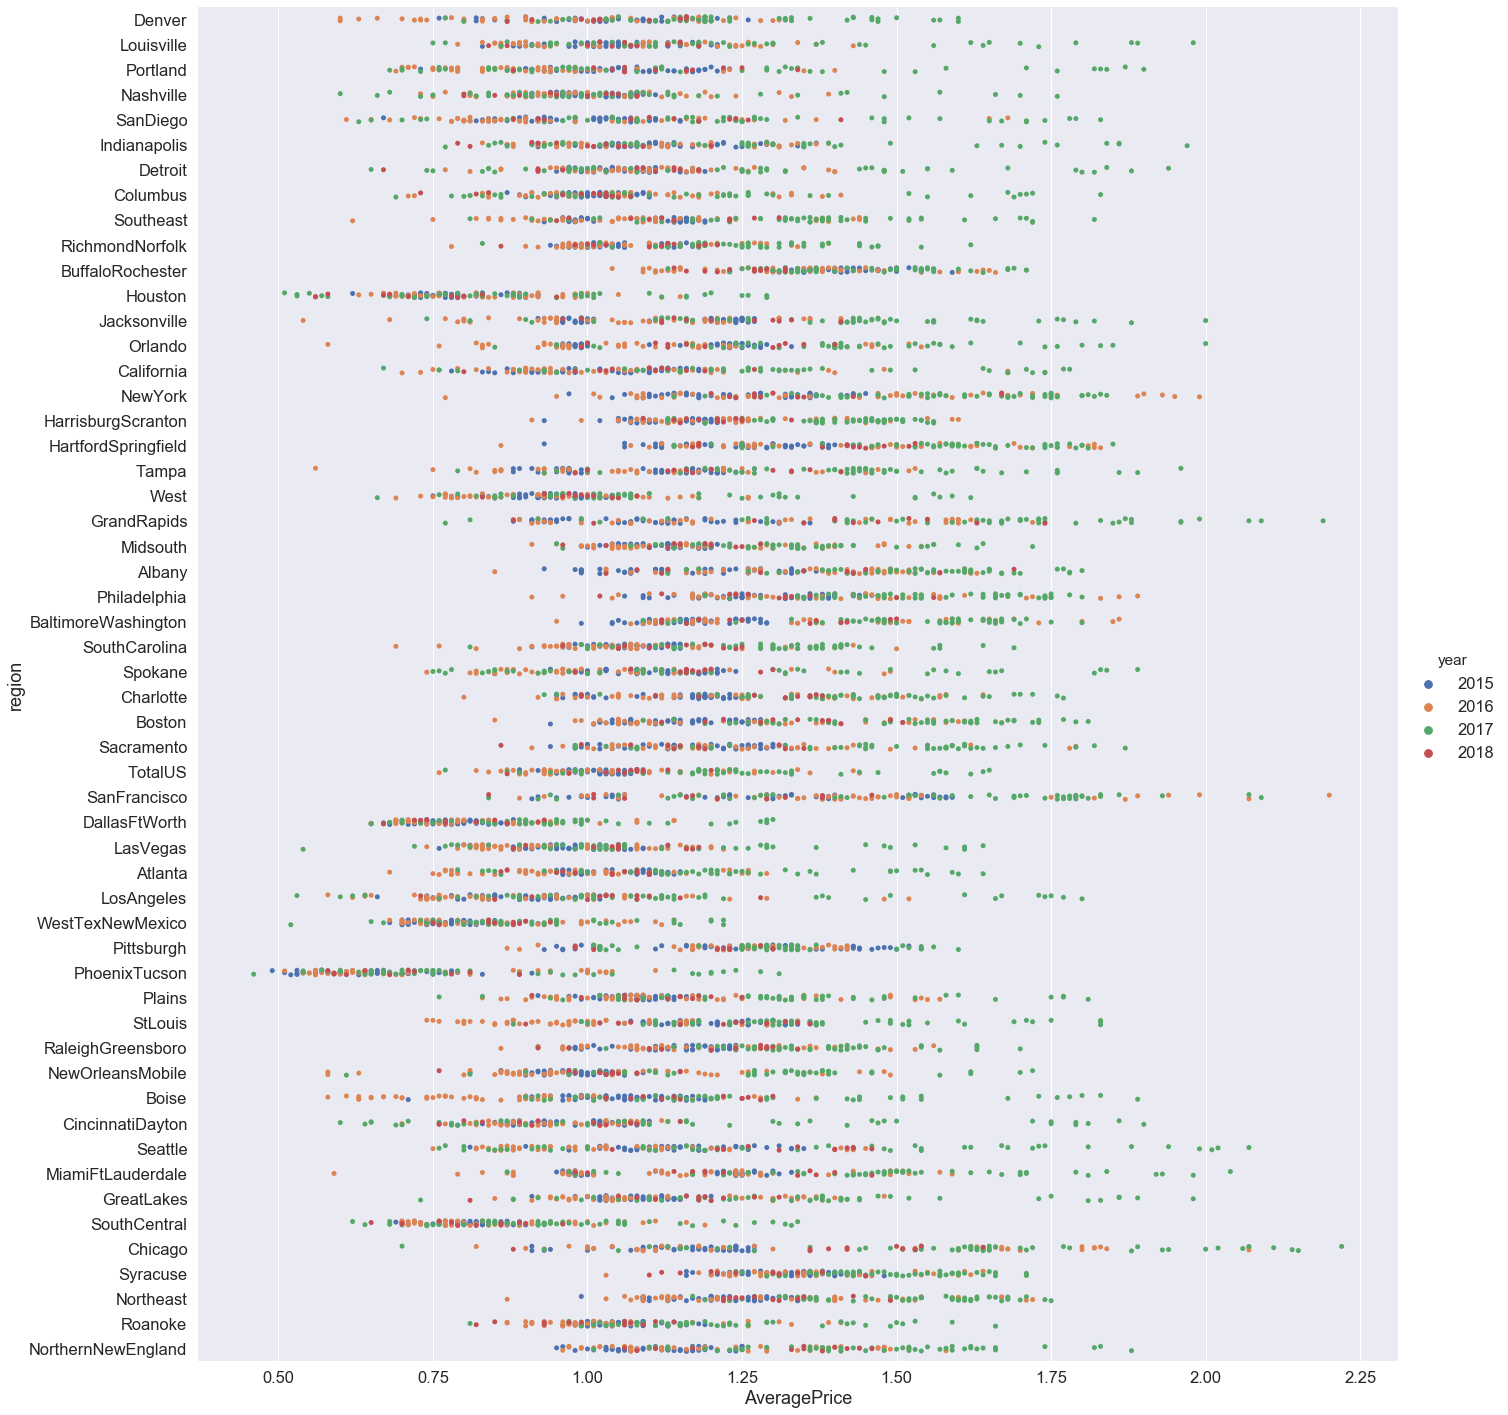

In [80]:
 # plot the avocado prices vs. regions for conventional avocados
plt.figure(figsize=(10,10))
conventional=sns.catplot('AveragePrice','region',data=avocado_df[avocado_df['type']=='conventional'],hue='year',
height=20)


<Figure size 720x720 with 0 Axes>

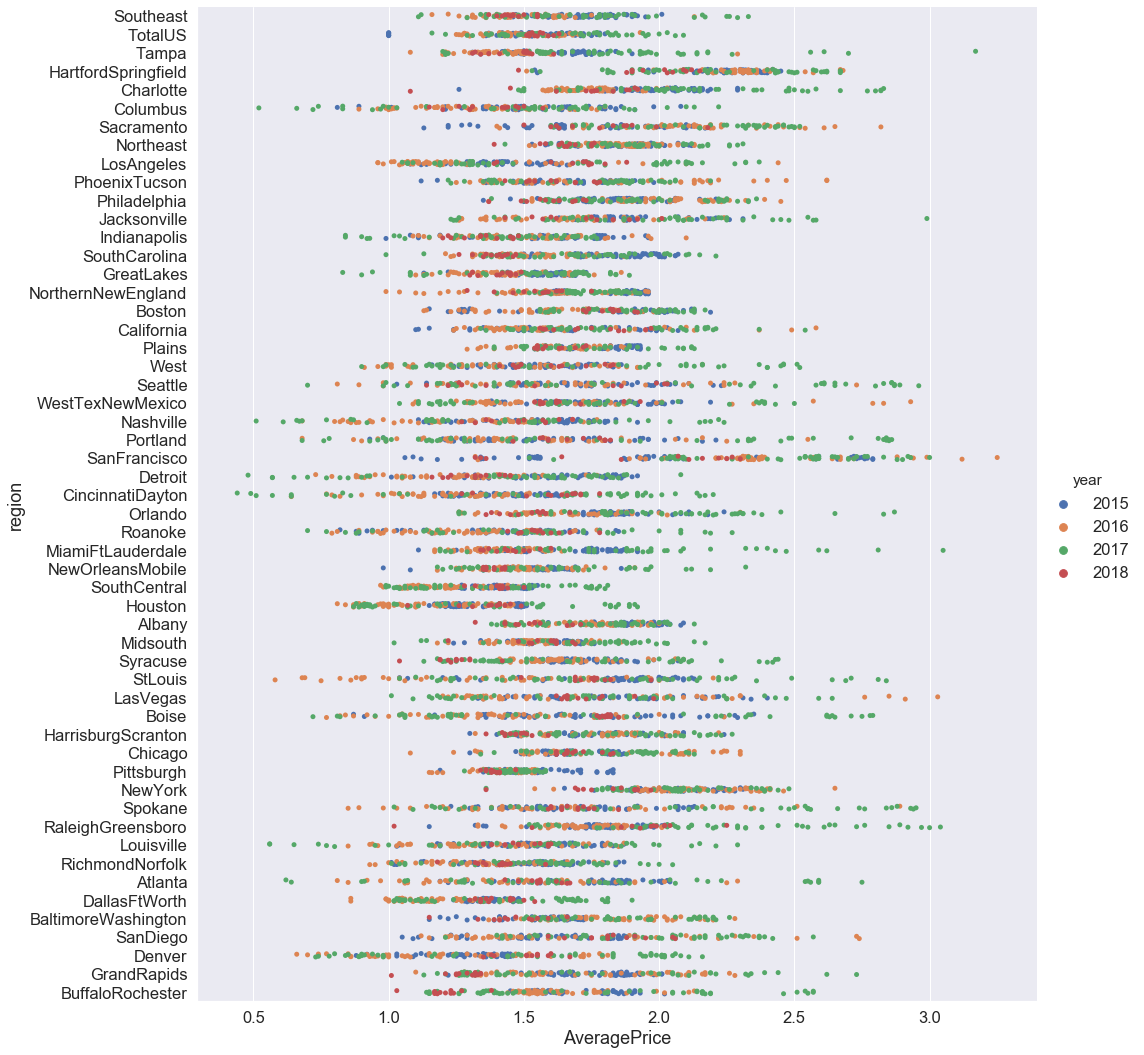

In [85]:
  # plot the avocado prices vs. regions for organic avocados
plt.figure(figsize=(10,10))
organic=sns.catplot('AveragePrice','region',data=avocado_df[avocado_df['type']=='organic'],hue='year',height=15)

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [86]:
avocado_df.columns.values

array(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'], dtype=object)

In [88]:
avocado_prophet_df = avocado_df[['Date','AveragePrice']]

In [91]:
avocado_prophet_df=avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [93]:
avocado_prophet_df.head(5)

,ds,y
11569,2015-01-04,1.75
11829,2015-01-04,1.46
11777,2015-01-04,1.70
675,2015-01-04,0.99
1247,2015-01-04,0.92


# TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET

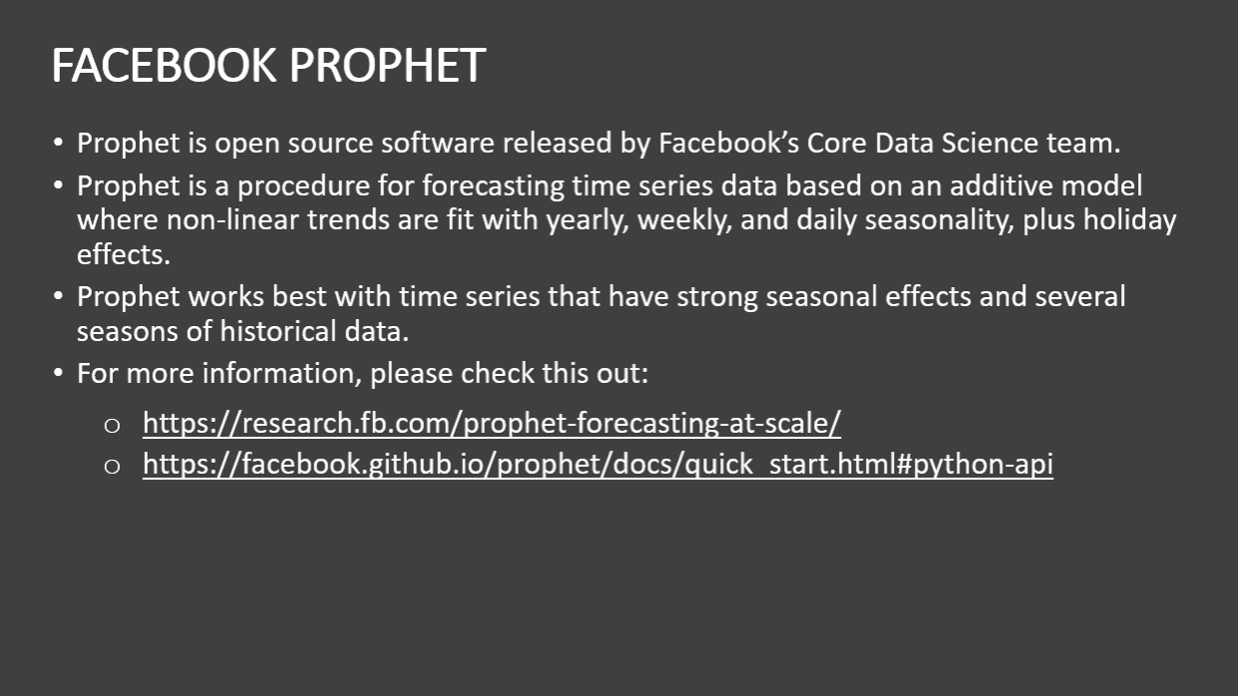

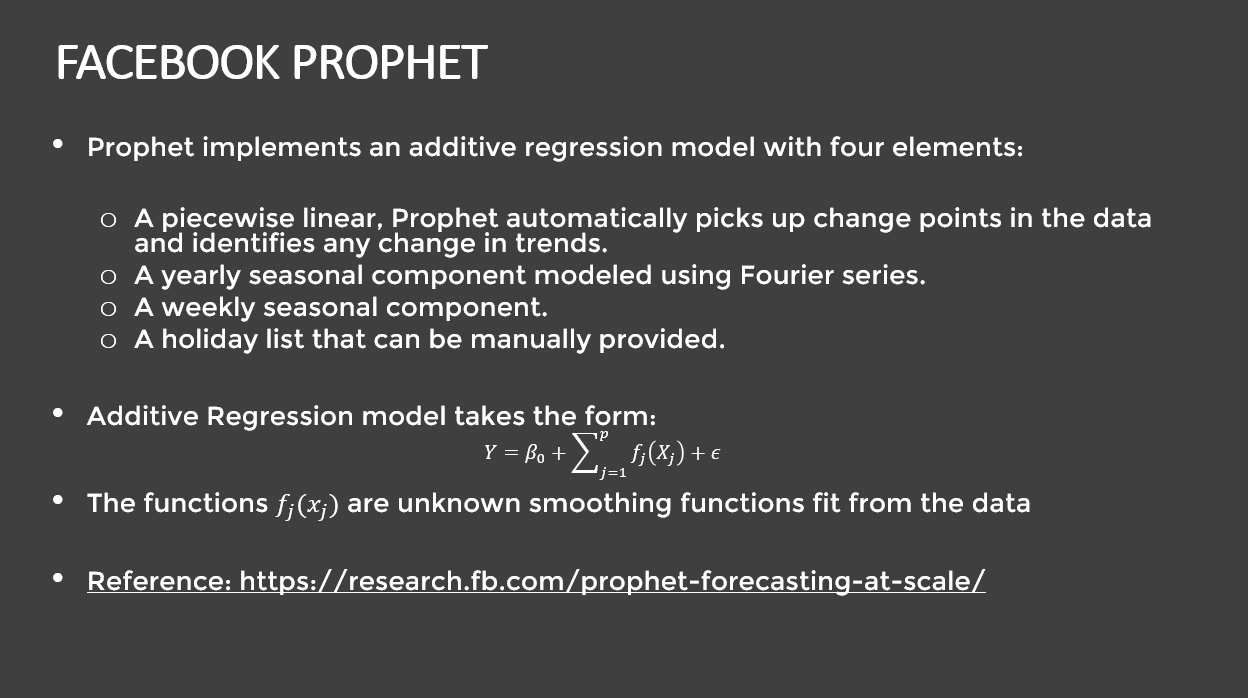

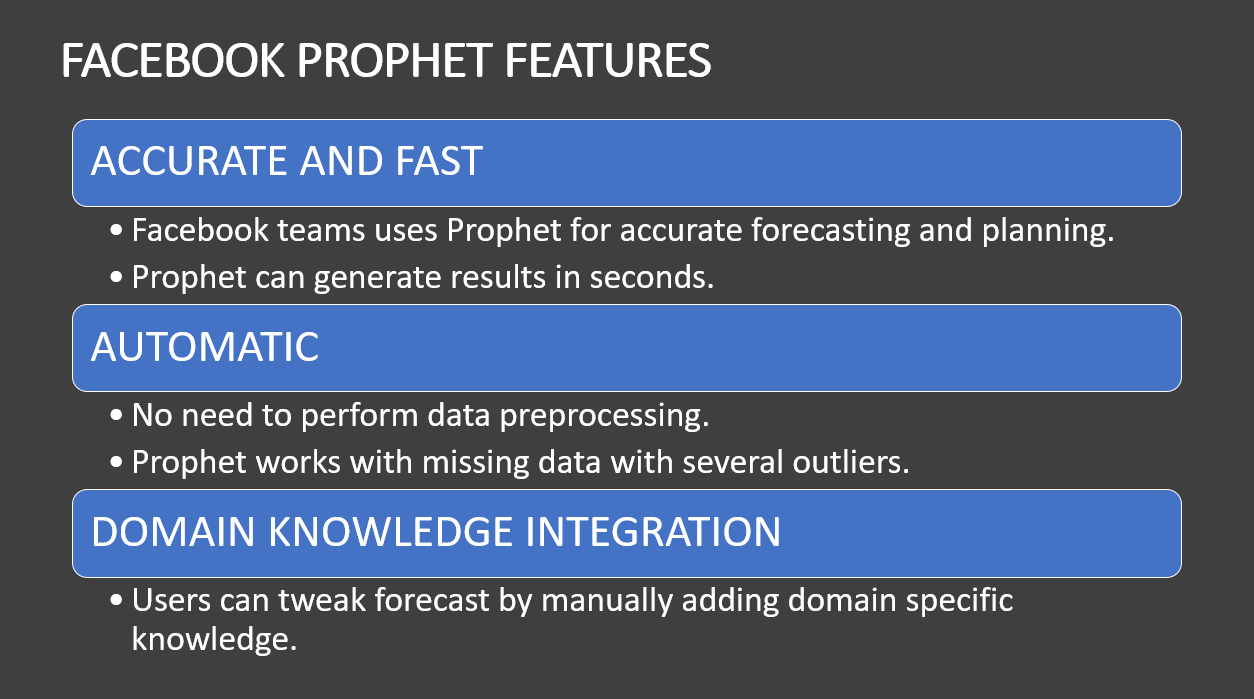

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [94]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khana\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [95]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [97]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498529,0.902427,1.844806,1.498529,1.498529,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,0.0,0.0,0.0,1.384595
1,2015-01-04,1.498529,0.904615,1.892605,1.498529,1.498529,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,0.0,0.0,0.0,1.384595
2,2015-01-04,1.498529,0.905984,1.888697,1.498529,1.498529,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,0.0,0.0,0.0,1.384595
3,2015-01-04,1.498529,0.895582,1.843223,1.498529,1.498529,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,0.0,0.0,0.0,1.384595
4,2015-01-04,1.498529,0.914077,1.874028,1.498529,1.498529,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,-0.113934,0.0,0.0,0.0,1.384595


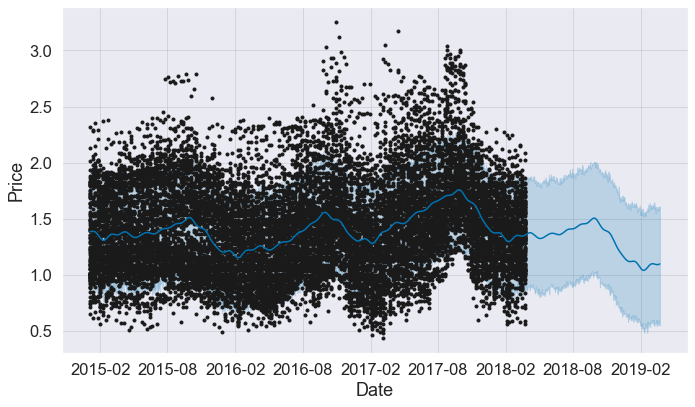

In [98]:
figure=m.plot(forecast,xlabel='Date',ylabel='Price')

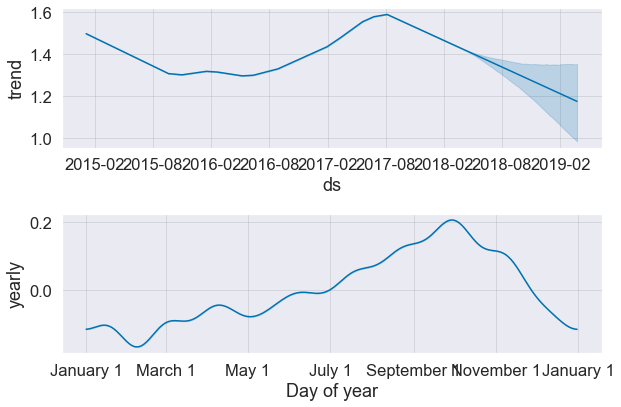

In [99]:
figure2=m.plot_components(forecast)

# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [ ]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')

In [102]:
# Select specific region
avocado_df_sample=avocado_df[avocado_df['region']=='SanFrancisco']

In [104]:
avocado_df_sample=avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


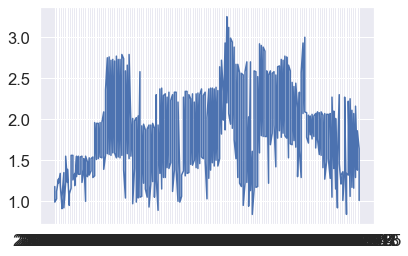

In [105]:
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [107]:
avocado_df_sample

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11361,2015-01-04,1.18,22630.58,13175.57,9028.34,0.00,426.67,426.67,0.00,0.00,organic,2015,SanFrancisco
2235,2015-01-04,0.99,907795.89,179507.69,637000.10,8803.79,82484.31,82033.71,444.44,6.16,conventional,2015,SanFrancisco
2234,2015-01-11,1.03,916450.76,155455.32,670522.75,4107.26,86365.43,85706.54,658.89,0.00,conventional,2015,SanFrancisco
11360,2015-01-11,1.12,29676.78,17907.49,11586.46,0.00,182.83,182.83,0.00,0.00,organic,2015,SanFrancisco
11359,2015-01-18,1.27,41482.48,26336.41,14789.40,0.00,356.67,356.67,0.00,0.00,organic,2015,SanFrancisco
2233,2015-01-18,1.22,753746.51,107566.95,554501.21,12868.74,78809.61,78241.87,515.56,52.18,conventional,2015,SanFrancisco
11358,2015-01-25,1.34,27146.81,17038.27,9879.87,0.00,228.67,228.67,0.00,0.00,organic,2015,SanFrancisco
2232,2015-01-25,1.21,713523.24,127276.45,481792.41,21293.67,83160.71,82293.47,796.67,70.57,conventional,2015,SanFrancisco
2231,2015-02-01,0.91,1352027.64,369580.89,896514.30,20587.92,65344.53,64393.44,832.23,118.86,conventional,2015,SanFrancisco
11357,2015-02-01,1.06,57802.02,38413.44,19160.87,0.00,227.71,227.71,0.00,0.00,organic,2015,SanFrancisco


In [118]:
sf_df_sample=avocado_df_sample[['Date','AveragePrice']]

In [119]:
sf_df_sample=sf_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

In [125]:
365*3

1095

In [129]:
m2 = Prophet()
m2.fit(sf_df_sample)
# Forcasting into the future
future2 = m2.make_future_dataframe(periods=1095)
forecast2 = m2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khana\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


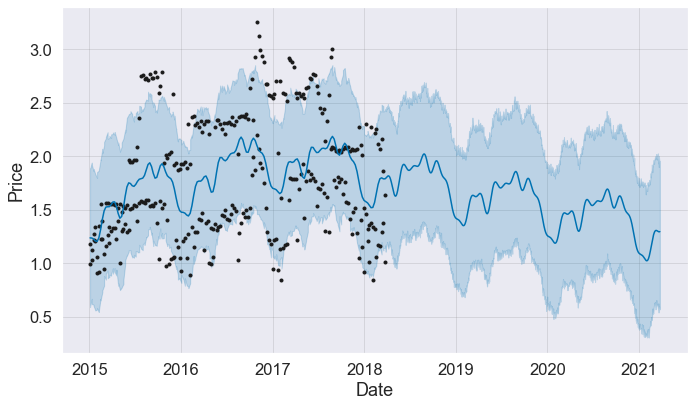

In [130]:
figure2 = m2.plot(forecast2, xlabel='Date', ylabel='Price')

<Figure size 720x1440 with 0 Axes>

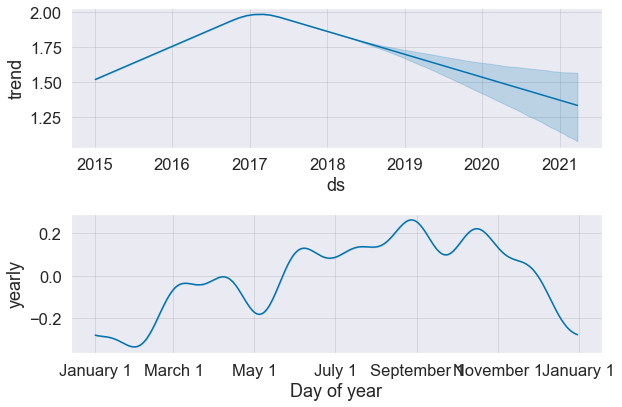

In [131]:
plt.figure(figsize=(10,20))
figure3 = m2.plot_components(forecast2)

In [132]:
avocado_df = pd.read_csv('avocado.csv')
avocado_df.head()
avocado_df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# GREAT JOB!